In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [ ]:
Data = pd.read_excel('Composite Dep Data.xlsx')
Data.head()

,Date/Time,T_air,RH_air,Radiative intensity,Heating energy by auxiliary heater,Radiant VA chiller supplied cooling energy,DOAS VC chiller supplied cooling energy,Heating energy by solar collector,Heating energy by gas boiler,Output 1 (Cooling capacity),Output 2 (Heating load)
0,2023-01-02 09:00:00,10.8875,58.750,385.5000,6323.376,0.00,0.000,-110708.000,116645.20,0.000,12260.576
1,2023-01-02 10:00:00,13.5250,48.750,809.7500,35776.870,0.00,6051.082,9041.437,27640.82,6051.082,72459.127
2,2023-01-02 11:00:00,16.4375,40.625,953.9375,120066.400,14853.30,23474.050,121198.000,0.00,38327.350,241264.400
3,2023-01-02 12:00:00,18.6625,34.250,1045.2500,183090.900,20258.60,35664.260,183061.000,0.00,55922.860,366151.900
4,2023-01-02 13:00:00,20.1750,30.125,771.1250,145662.000,19393.08,25883.420,144844.100,0.00,45276.500,290506.100


In [ ]:
# Assuming 'datetime_column' is your datetime column
# Data['Timestamp'] = pd.to_datetime(Data['Date/Time']).dt.hour
# Data['Year'] = pd.to_datetime(Data['Date/Time']).dt.year
# Data['Month'] = pd.to_datetime(Data['Date/Time']).dt.month
# Data['Day'] = pd.to_datetime(Data['Date/Time']).dt.day
Data['Date/Time']
# Data.info()

0      2023-01-02 09:00:00
1      2023-01-02 10:00:00
2      2023-01-02 11:00:00
3      2023-01-02 12:00:00
4      2023-01-02 13:00:00
               ...        
2595   2023-12-29 14:00:00
2596   2023-12-29 15:00:00
2597   2023-12-29 16:00:00
2598   2023-12-29 17:00:00
2599   2023-12-29 18:00:00
Name: Date/Time, Length: 2600, dtype: datetime64[ns]

In [ ]:
Data = Data.drop(['Date/Time'], axis = 1)
Data = Data[Data['Heating energy by auxiliary heater']>0]
Data

,T_air,RH_air,Radiative intensity,Heating energy by auxiliary heater,Radiant VA chiller supplied cooling energy,DOAS VC chiller supplied cooling energy,Heating energy by solar collector,Heating energy by gas boiler,Output 1 (Cooling capacity),Output 2 (Heating load)
0,10.8875,58.750,385.5000,6323.376,0.00,0.000,-110708.000,116645.20,0.000,12260.576
1,13.5250,48.750,809.7500,35776.870,0.00,6051.082,9041.437,27640.82,6051.082,72459.127
2,16.4375,40.625,953.9375,120066.400,14853.30,23474.050,121198.000,0.00,38327.350,241264.400
3,18.6625,34.250,1045.2500,183090.900,20258.60,35664.260,183061.000,0.00,55922.860,366151.900
4,20.1750,30.125,771.1250,145662.000,19393.08,25883.420,144844.100,0.00,45276.500,290506.100
...,...,...,...,...,...,...,...,...,...,...
2595,20.0000,42.250,505.0625,78525.160,17683.22,43114.650,76423.580,0.00,60797.870,154948.740
2596,20.0625,44.250,171.6250,36301.080,4964.62,43079.440,-6820.020,41787.88,48044.060,71268.940
2597,19.4750,47.500,50.5625,26483.390,0.00,40005.250,-65525.600,92069.77,40005.250,53027.560
2598,18.2875,51.500,47.3750,11396.350,0.00,33653.110,-88146.500,99401.88,33653.110,22651.730


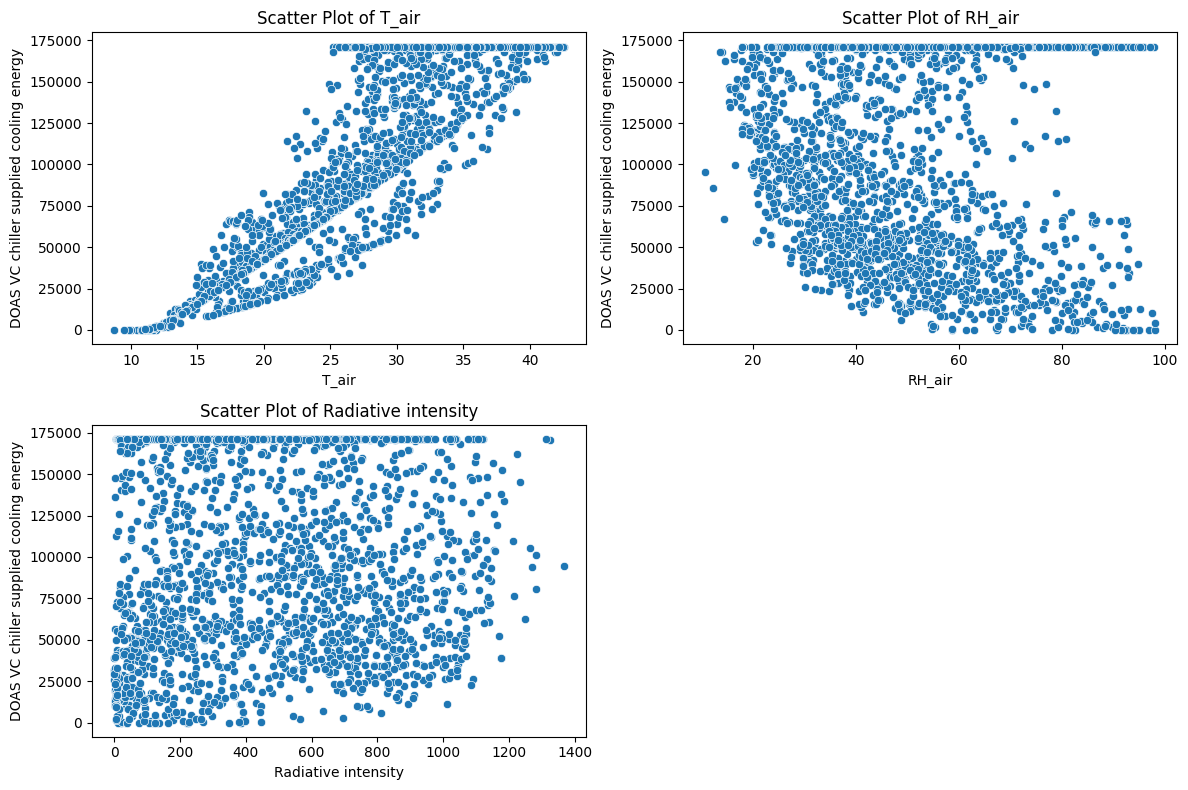

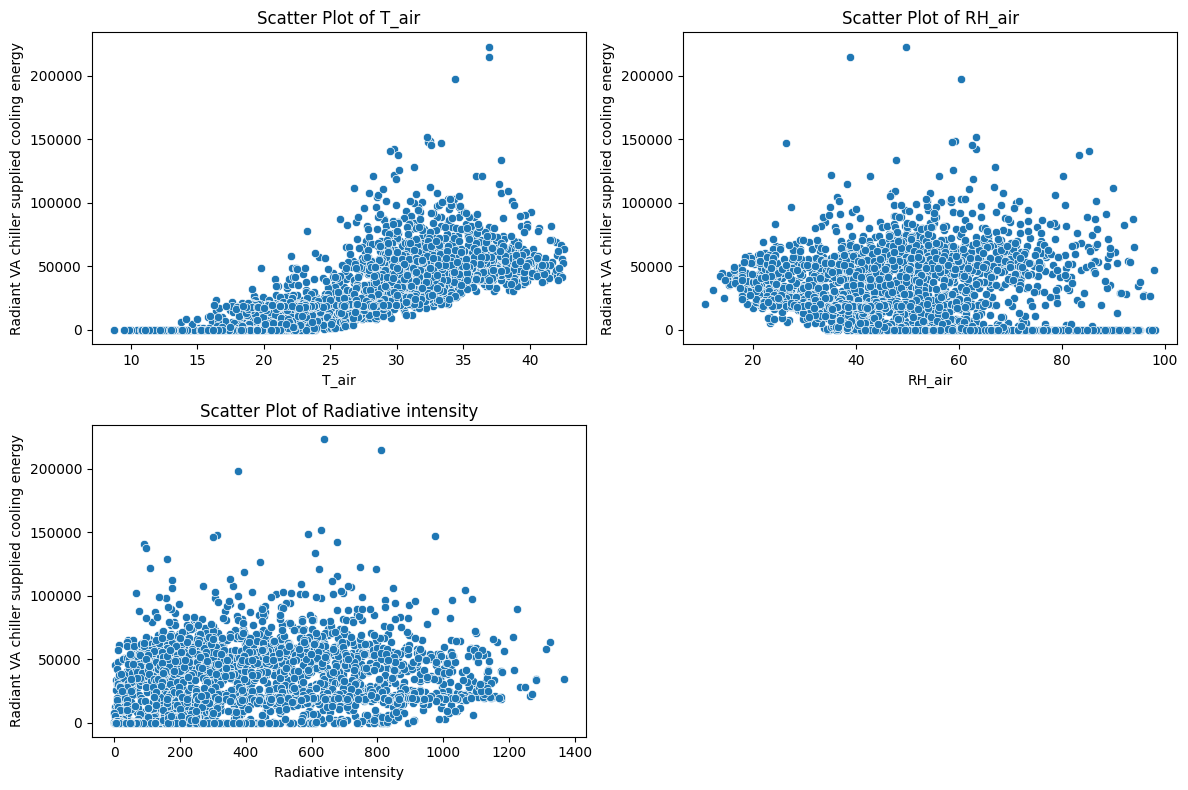

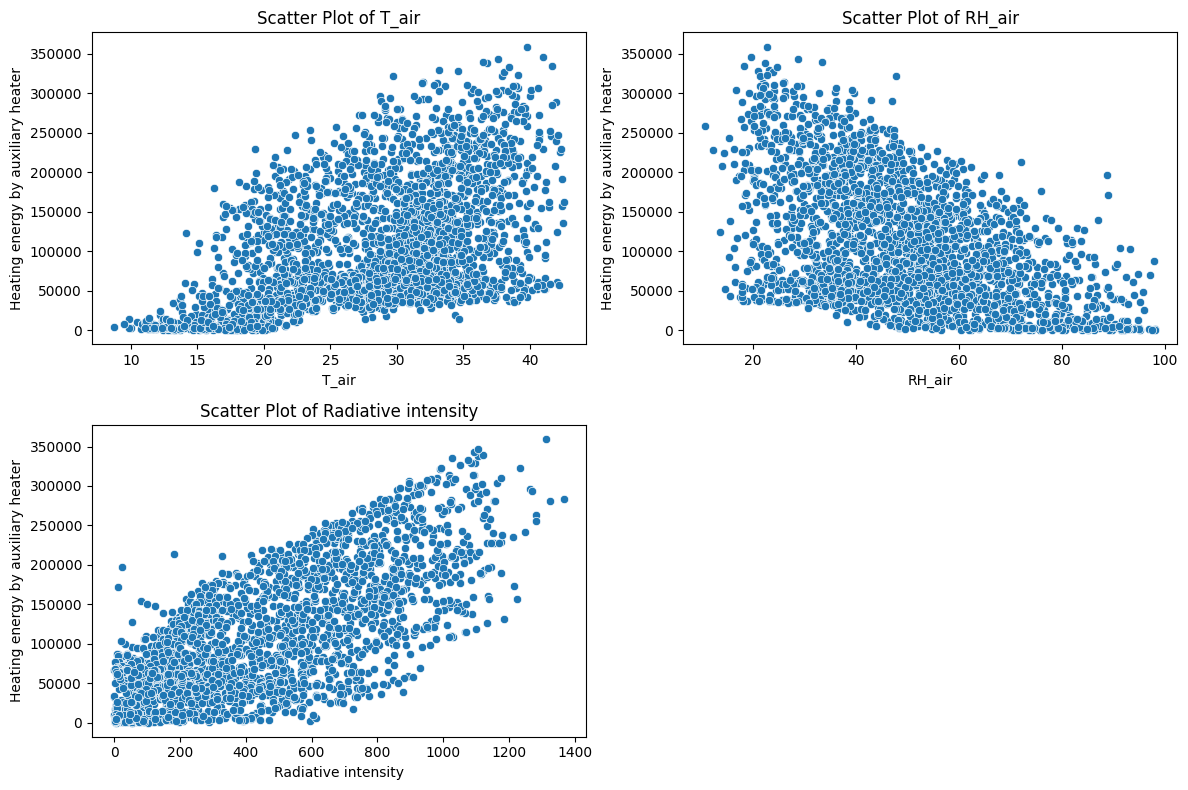

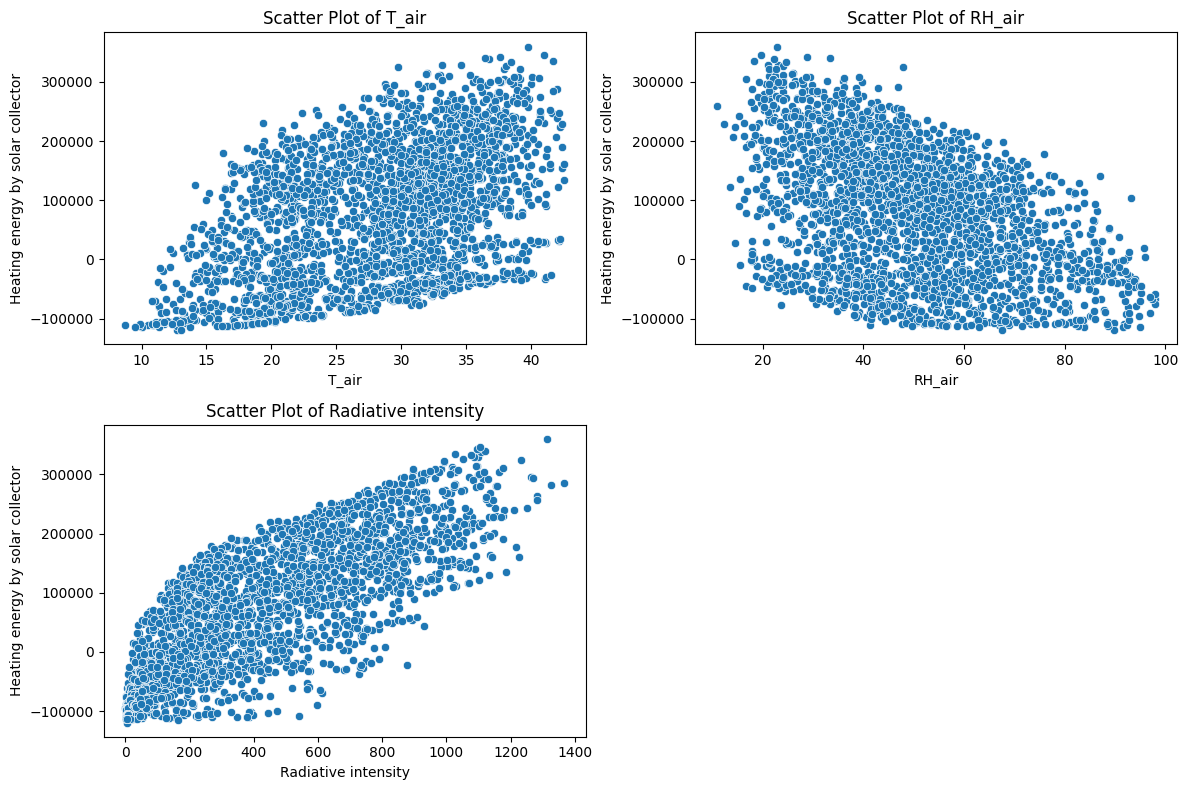

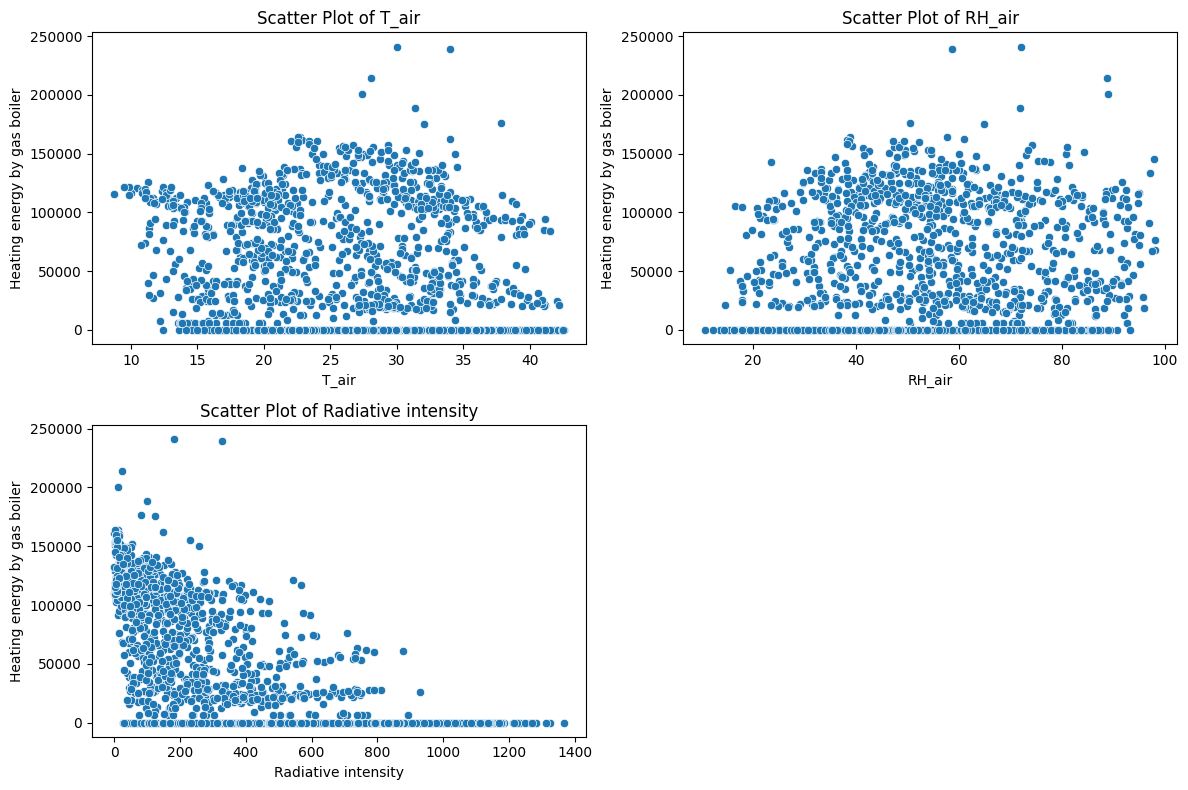

In [ ]:
# Plot scatter plots for each feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='DOAS VC chiller supplied cooling energy', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Radiant VA chiller supplied cooling energy', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by auxiliary heater', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by solar collector', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 2, i + 1)

    # Scatter Plot
    sns.scatterplot(x=feature, y='Heating energy by gas boiler', data=Data)
    plt.title(f'Scatter Plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
Data['Heating Energy'] = Data['Heating energy by auxiliary heater'] + Data['Heating energy by solar collector'] + Data['Heating energy by gas boiler'] + 9999
Data['Cooling Energy'] = Data['DOAS VC chiller supplied cooling energy'] + Data['Radiant VA chiller supplied cooling energy']


In [ ]:
Data = Data.drop(['DOAS VC chiller supplied cooling energy'] , axis = 1)
Data = Data.drop(['Radiant VA chiller supplied cooling energy'] , axis = 1)
Data = Data.drop(['Heating energy by gas boiler'], axis = 1)
Data = Data.drop(['Heating energy by solar collector'] , axis = 1)
Data = Data.drop(['Heating energy by auxiliary heater'], axis = 1)

Data = Data.drop(['Output 1 (Cooling capacity)'], axis = 1)
Data = Data.drop(['Output 2 (Heating load)'], axis = 1)

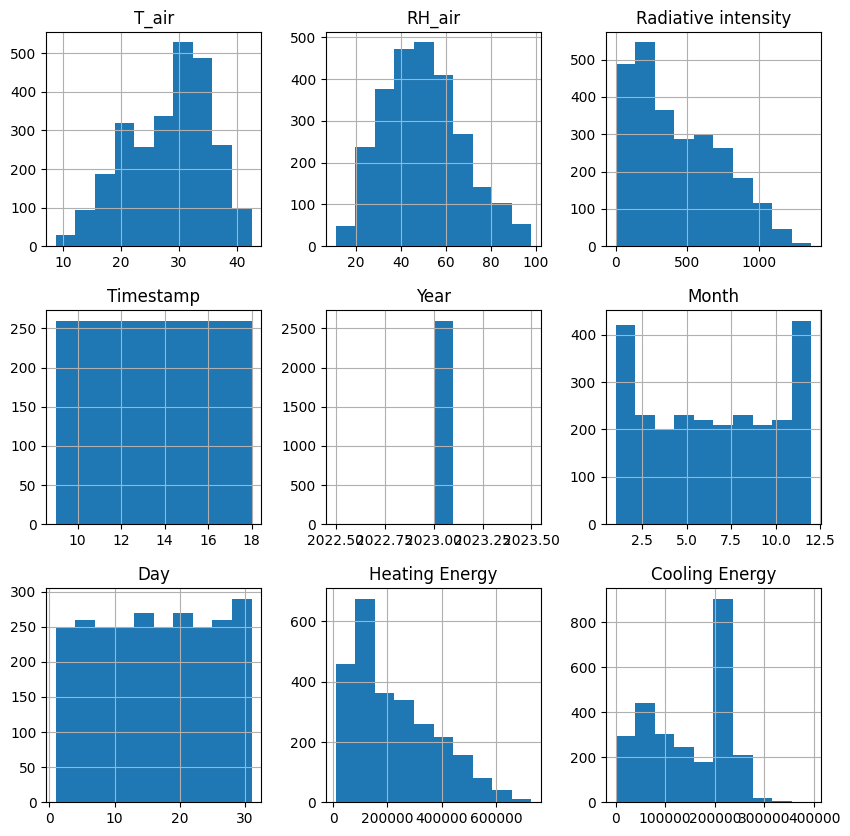

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
# Replace 'data' with the name of your DataFrame if it's different
Data.hist(figsize=(10, 10))  # Adjust figsize as needed
plt.show()


In [ ]:
# import numpy as np
# import pandas as pd

# # Assuming 'data' is your DataFrame with skewed columns
# # Replace 'data' with the name of your DataFrame if it's different

# # List of columns to be transformed
# columns_to_transform = ['Heating Energy', 'Cooling Energy']

# # Apply logarithmic transformation to selected columns
# Data[columns_to_transform] = np.log1p(Data[columns_to_transform])

# # Plot histograms of transformed data
# Data.hist(figsize=(10, 10))
# plt.show()


In [ ]:
# import pandas as pd

# # Assuming 'Data' is your DataFrame
# # Replace 'Data' with the name of your DataFrame if it's different

# # Identify the column you want to filter
# column_to_filter = 'Cooling Energy'

# # Determine the range of values within 200-300
# lower_limit = 200000
# upper_limit = 300000

# # Filter the DataFrame to retain only values within the specified range
# filtered_data = Data[(Data[column_to_filter] >= lower_limit) & (Data[column_to_filter] <= upper_limit)]

# # Calculate the number of occurrences to retain (20% of total)
# num_to_retain = int(0.1 * len(filtered_data))

# # Sort the DataFrame by the column to be filtered
# sorted_data = filtered_data.sort_values(by=column_to_filter)

# # Remove 80% of occurrences of values outside the specified range
# final_data = pd.concat([sorted_data.head(num_to_retain), sorted_data.tail(num_to_retain)])

# # Alternatively, you can directly drop the values outside the range
# # final_data = Data[(Data[column_to_filter] >= lower_limit) & (Data[column_to_filter] <= upper_limit)]

# # Display the final DataFrame
# print(final_data)


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming 'data' is your DataFrame
# # Replace 'data' with the name of your DataFrame if it's different
# filtered_data.hist(figsize=(10, 10))  # Adjust figsize as needed
# plt.show()


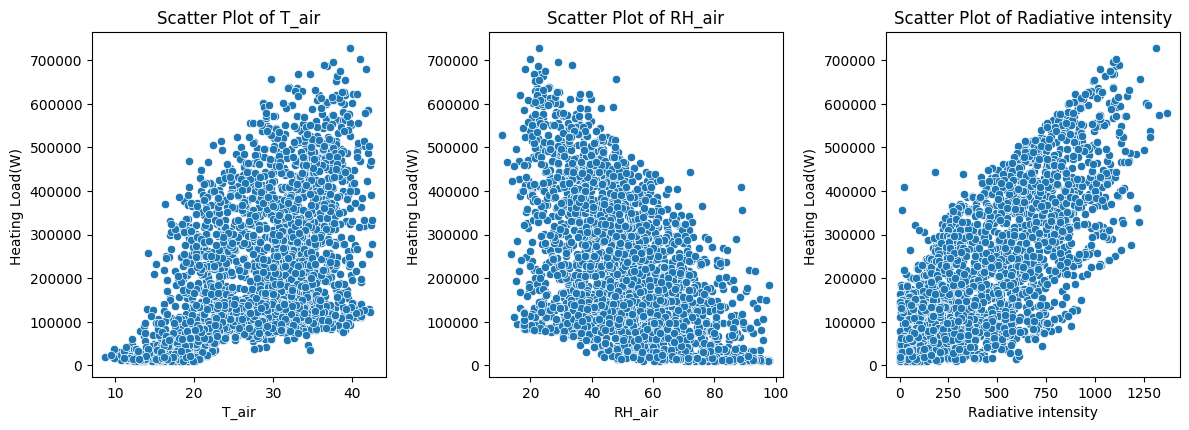

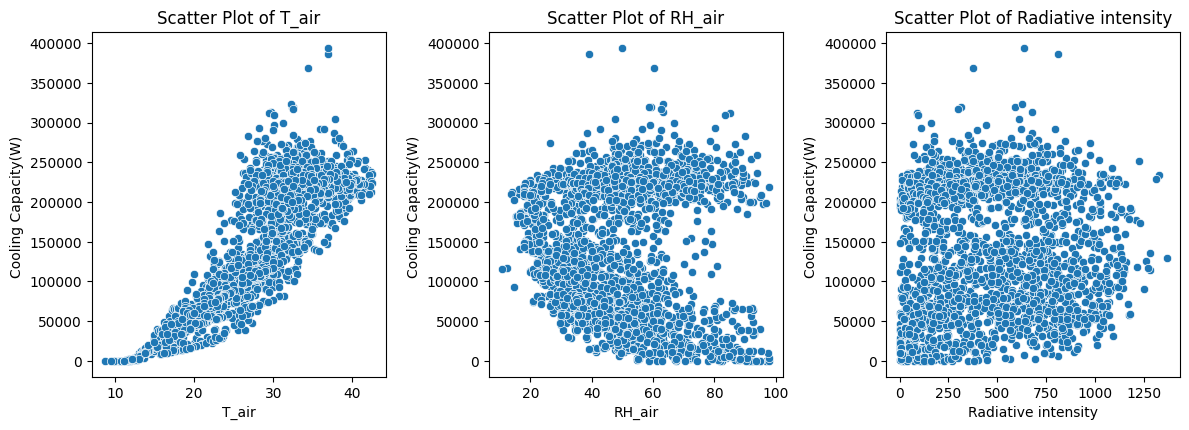

In [ ]:
Data

# plt.figure(figsize=(12, 8))

# for i, feature in enumerate(Data.columns[0:3]):
#     plt.subplot(2, 2, i + 1)

#     # Scatter Plot
#     sns.scatterplot(x=feature, y='Heating Energy', data=Data)
#     plt.title(f'Scatter Plot of {feature}')
#     plt.ylabel('Heating Load(W) ')

# plt.tight_layout()
# plt.figure(figsize=(12, 8))

# for i, feature in enumerate(Data.columns[0:3]):
#     plt.subplot(2, 2, i + 1)

#     # Scatter Plot
#     sns.scatterplot(x=feature, y='Cooling Energy', data=Data)
#     plt.title(f'Scatter Plot of {feature}')
#     # plt.xlabel(f'T_air(°C) {feature} ')  # Replace 'Renamed' with your desired label
#     plt.ylabel('Cooling Capacity(W) ')


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Data is your DataFrame and it contains the necessary columns
# Modify this with your actual DataFrame

plt.figure(figsize=(12, 8))

# Scatter plots for Heating Energy
for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=feature, y='Heating Energy', data=Data)
    plt.title(f'Scatter Plot of {feature}')
    plt.ylabel('Heating Load(W) ')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

# Scatter plots for Cooling Energy
for i, feature in enumerate(Data.columns[0:3]):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=feature, y='Cooling Energy', data=Data)
    plt.title(f'Scatter Plot of {feature}')
    plt.ylabel('Cooling Capacity(W) ')

plt.tight_layout()
plt.show()


Outliers in Heating Energy:
        T_air  RH_air  Radiative intensity  Timestamp  Year  Month  Day  \
664   33.1500  23.125             1097.813         13  2023      4    4   
753   34.6125  21.125             1085.625         12  2023      4   17   
833   36.7500  22.375             1107.063         12  2023      4   27   
1003  38.0875  24.000             1052.563         12  2023      5   22   
1113  36.4750  33.500             1121.000         12  2023      6    6   
1114  37.6250  28.875             1094.688         13  2023      6    6   
1123  38.4375  24.750             1077.000         12  2023      6    7   
1142  39.7500  22.875             1312.500         11  2023      6    9   
1143  41.0000  19.750             1105.875         12  2023      6    9   
1144  41.6750  18.375             1027.000         13  2023      6    9   

      Heating Energy  Cooling Energy  
664         668521.8       140390.99  
753         667799.2       185361.01  
833         686721.1       19

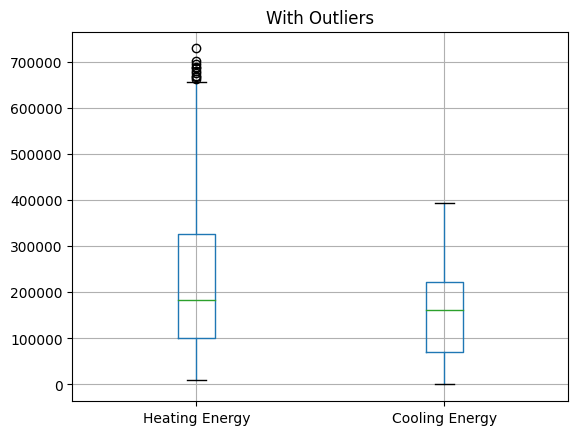

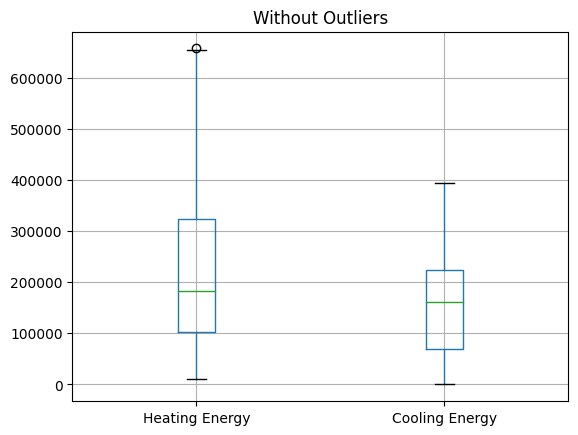

In [ ]:
# Function to detect outliers using IQR
# Data = Data.drop('Heating energy by gas boiler', axis = 1)

def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Specify the columns for which you want to detect outliers
columns_to_check = ['Heating Energy', 'Cooling Energy']

# Detect outliers for each column
outliers_dict = {}
for column in columns_to_check:
    outliers_dict[column] = detect_outliers(Data[column])

# Display outliers
for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(Data[outliers])

# Drop rows containing outliers
outliers_rows = outliers_dict[columns_to_check[0]]
for column in columns_to_check[1:]:
    outliers_rows |= outliers_dict[column]

cleaned_data = Data[~outliers_rows]

# Visualize the outliers using box plots
Data.boxplot(column=columns_to_check)
plt.title("With Outliers")
plt.show()

cleaned_data.boxplot(column=columns_to_check)
plt.title("Without Outliers")
plt.show()

In [ ]:
cleaned_data.shape
cleaned_data
cleaned_data.describe()

,T_air,RH_air,Radiative intensity,Timestamp,Year,Month,Day,Heating Energy,Cooling Energy
count,2590.000000,2590.000000,2590.000000,2590.000000,2590.0,2590.000000,2590.000000,2590.000000,2590.000000
mean,28.219788,49.835232,429.583217,13.505019,2023.0,6.512355,15.796911,221635.981675,148532.645578
std,7.083258,17.462547,304.380511,2.876996,0.0,3.443923,8.779809,150757.668110,81392.658174
min,8.762500,10.875000,0.187500,9.000000,2023.0,1.000000,1.000000,9812.633000,0.000000
25%,22.515625,37.000000,175.125000,11.000000,2023.0,3.000000,8.000000,101767.115000,69939.687500
50%,29.593750,48.750000,365.062500,14.000000,2023.0,7.000000,16.000000,182161.830000,162174.100000
75%,33.487500,61.125000,662.468750,16.000000,2023.0,10.000000,23.000000,323590.625000,222956.595000
max,42.537500,98.000000,1366.813000,18.000000,2023.0,12.000000,31.000000,656867.100000,394386.700000


In [ ]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
#'Year','Month','Day'
X = cleaned_data[['Timestamp','Year','Month','Day','Radiative intensity','T_air','RH_air']].values
# y_DOAS = np.array(cleaned_data[['DOAS VC chiller supplied cooling energy']].values)
# y_Rad =np.array(cleaned_data[['Radiant VA chiller supplied cooling energy']].values)
# y_solar = np.array(cleaned_data[['Heating energy by solar collector']].values)
# y_aux = np.array(cleaned_data[['Heating energy by auxiliary heater']].values)
# y_boil = np.array(cleaned_data[['Heating energy by gas boiler']].values)
# y_C = y_DOAS + y_Rad
# y_H = y_solar + y_aux + y_boil
y_C = cleaned_data['Cooling Energy']
y_H = cleaned_data['Heating Energy']

y_C = np.array(y_C).reshape(-1, 1)
y_H = np.array(y_H).reshape(-1, 1)

# Initialize the MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y_C = MinMaxScaler()    # For Cooling Energy
scaler_y_H = MinMaxScaler()    # For Heating Energy


# scaler = StandardScaler()
X_Normalized = scaler_x.fit_transform(X)
Y_Normalized_C = scaler_y_C.fit_transform(y_C)
Y_Normalized_H = scaler_y_H.fit_transform(y_H)

# X_train, X_test, y_train_C, y_test_C = train_test_split(X_Normalized, Y_Normalized_C, test_size=0.2, random_state=42)
# X_train, X_test, y_train_H, y_test_H = train_test_split(X_Normalized, Y_Normalized_H, test_size=0.2, random_state=42)

# from sklearn.model_selection import train_test_split

# Generate indices for splitting
indices = range(len(X_Normalized))
indices_train, indices_test = train_test_split(indices, test_size=0.2, random_state=42)

# Split the data into training and testing sets
X_train_all, X_test_all = X_Normalized[indices_train], X_Normalized[indices_test]
y_train_C, y_test_C = Y_Normalized_C[indices_train], Y_Normalized_C[indices_test]

# Use the same indices to select subsets of the data for regression target
y_train_H, y_test_H = Y_Normalized_H[indices_train], Y_Normalized_H[indices_test]

# Ensure X_train and X_test are the same for both targets
X_train = X_train_all.copy()
X_test = X_test_all.copy()



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers , regularizers
from tensorflow.keras.regularizers import l2 , l1
from tensorflow.keras.utils import plot_model

model = models.Sequential()

# Input layer
model.add(layers.Dense(16, activation='relu', input_shape=(7,)))

model.add(layers.Dense(32, activation='relu' ))
model.add(layers.Dense(64, activation='relu' ))
model.add(layers.Dense(128, activation='relu' ))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))

# Output layer
model.add(layers.Dense(1, activation='linear'))


# Display the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 16)                128       
                                                                 
 dense_53 (Dense)            (None, 32)                544       
                                                                 
 dense_54 (Dense)            (None, 64)                2112      
                                                                 
 dense_55 (Dense)            (None, 128)               8320      
                                                                 
 dense_56 (Dense)            (None, 256)               33024     
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_57 (Dense)            (None, 512)              

In [ ]:
import numpy as np
from keras import backend as K
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Avoid division by zero
    non_zero_mask = y_true != 0
    y_true, y_pred = y_true[non_zero_mask], y_pred[non_zero_mask]

    # Calculate MAPE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return mape

def r2_metric(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))

def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# def corrcoef(y_true, y_pred):
#     corr = np.corrcoef(y_true, y_pred)[0, 1]
#     return corr

def corrcoef(y_true, y_pred):
    # Flatten input arrays
    y_true_flat = np.array(y_true).flatten()
    y_pred_flat = np.array(y_pred).flatten()

    # Remove NaN values
    mask = ~np.isnan(y_true_flat) & ~np.isnan(y_pred_flat)
    y_true_flat = y_true_flat[mask]
    y_pred_flat = y_pred_flat[mask]

    # Calculate correlation coefficient
    corr = np.corrcoef(y_true_flat, y_pred_flat)[0, 1]

    return corr

In [ ]:
# # Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='mse' , metrics=[r2_metric])

# Train the model
history = model.fit(X_train, y_train_C, epochs=200, batch_size=42, validation_data=(X_test, y_test_C), verbose =1)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
mae = mean_absolute_percentage_error(y_test_C, y_pred)
mse = mean_squared_error(y_test_C, y_pred)
r_squared = r2_score(y_test_C, y_pred)
mae_r=mean_absolute_error(y_test_C, y_pred)
cor = corrcoef(y_test_C, y_pred)
print('For test Data with Output Cooling Energy')
print(f'Mean Absolute Percentage Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r_squared}')
print(f'MAE: {mae_r}')
print(f'Correlation: {cor}')

mae_train = mean_absolute_percentage_error(y_train_C, y_pred_train)
mse_train = mean_squared_error(y_train_C, y_pred_train)
r_squared_train = r2_score(y_train_C, y_pred_train)
mae_r_train=mean_absolute_error(y_train_C, y_pred_train)
cor_train = corrcoef(y_train_C, y_pred_train)
print('For train Data with output Cooling Energy')
print(f'Mean Absolute Percentage Error (MAE): {mae_train}')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'R-squared: {r_squared_train}')
print(f'MAE: {mae_r_train}')
print(f'Correlation: {cor_train}')
# Inverse transform predictions to original scale
y_pred_original_scale = scaler_y_C.inverse_transform(y_pred)
y_test_original_scale = scaler_y_C.inverse_transform(y_test_C)

# Calculate R-squared
print('\n')
print('For scaled data')
r_squared = r2_score(y_test_original_scale, y_pred_original_scale)
print(f'R-squared for original value(Scaled): {r_squared}')

mae_values = [mean_absolute_percentage_error(y_test_original_scale, y_pred_original_scale)]
mse_values = [mean_squared_error(y_test_original_scale, y_pred_original_scale) ]
r2_values = [r2_score(y_test_original_scale, y_pred_original_scale) ]
cor_s = corrcoef(y_test_original_scale, y_pred_original_scale)
    # Display R-squared values for each output

print(f'R-squared for Output Dimension T: {r2_values}')

print(f'Mean Absolute Percentage Error (MAPE) T: {mae_values}')

print(f'Correlation: {cor_s}')
print('\n')



Epoch 1/200
50/50 [==============================] - 4s 16ms/step - loss: 0.0422 - r2_metric: 6.1799e-04 - val_loss: 0.0165 - val_r2_metric: 0.5847
Epoch 2/200
50/50 [==============================] - 1s 12ms/step - loss: 0.0106 - r2_metric: 0.7499 - val_loss: 0.0067 - val_r2_metric: 0.8359
Epoch 3/200
50/50 [==============================] - 1s 12ms/step - loss: 0.0053 - r2_metric: 0.8719 - val_loss: 0.0037 - val_r2_metric: 0.9073
Epoch 4/200
50/50 [==============================] - 1s 12ms/step - loss: 0.0044 - r2_metric: 0.8941 - val_loss: 0.0025 - val_r2_metric: 0.9338
Epoch 5/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0037 - r2_metric: 0.9103 - val_loss: 0.0021 - val_r2_metric: 0.9462
Epoch 6/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0029 - r2_metric: 0.9308 - val_loss: 0.0018 - val_r2_metric: 0.9556
Epoch 7/200
50/50 [==============================] - 1s 12ms/step - loss: 0.0027 - r2_metric: 0.9363 - val_loss: 0.0016 - val_r2_met

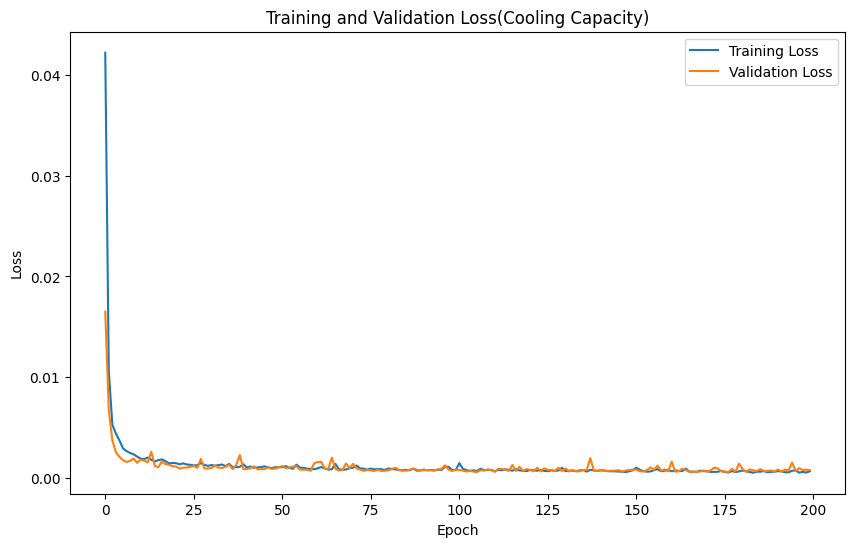

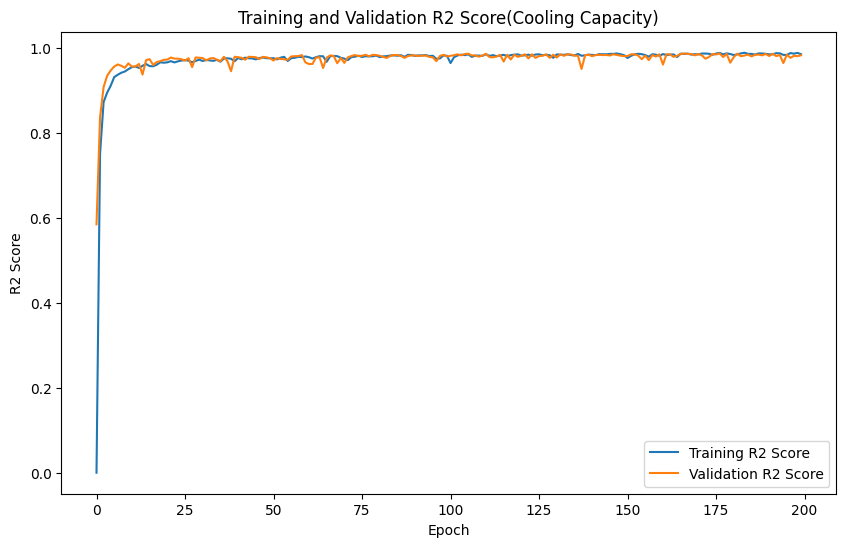

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss(Cooling Capacity)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_metric'], label='Training R2 Score')
plt.plot(history.history['val_r2_metric'], label='Validation R2 Score')
plt.title('Training and Validation R2 Score(Cooling Capacity)')
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

<ipython-input-70-eeb2b6576ec5>:9: RuntimeWarning: divide by zero encountered in divide
  absolute_percentage_error_train = np.abs((predicted_values_train - true_values_train) / true_values_train) * 100


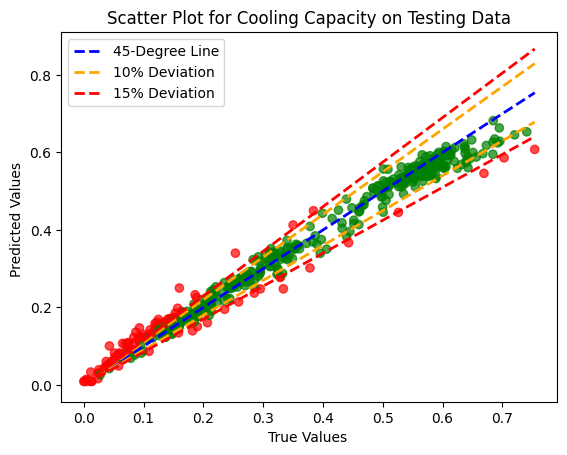

Number of data points within 15% deviation: 429/518
Number of data points within 10% deviation: 375/518


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train and y_train_pred are your training true and predicted values
true_values_train = y_test_C.flatten()
predicted_values_train = y_pred.flatten()

# Calculate the absolute percentage error for training data
absolute_percentage_error_train = np.abs((predicted_values_train - true_values_train) / true_values_train) * 100

# Set tolerance thresholds (e.g., 2% and 5%)
tolerance_threshold_2 = 10
tolerance_threshold_5 = 15

# Color-code the points based on the percentage difference
colors_train = np.where(absolute_percentage_error_train <= tolerance_threshold_5, 'green', 'red')

# Create a scatter plot for training data
plt.scatter(true_values_train, predicted_values_train, color=colors_train, alpha=0.7)
plt.plot([min(true_values_train), max(true_values_train)], [min(true_values_train), max(true_values_train)], linestyle='--', color='blue', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_2/100) * min(true_values_train), (1 - tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_2/100) * min(true_values_train), (1 + tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_5/100) * min(true_values_train), (1 - tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_5/100) * min(true_values_train), (1 + tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)

# Annotate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)
# plt.annotate(f'Within {tolerance_threshold_5}%: {num_within_5_percent}/{len(true_values_train)}',
            #  xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='black')

# Custom legend handles
legend_handles = [
    Line2D([0], [0], linestyle='--', color='blue', linewidth=2),
    Line2D([0], [0], linestyle='--', color='orange', linewidth=2),
    Line2D([0], [0], linestyle='--', color='red', linewidth=2)
]

plt.xlabel('True Values ')
plt.ylabel('Predicted Values ')
plt.title('Scatter Plot for Cooling Capacity on Testing Data')
plt.legend(legend_handles , ['45-Degree Line', f'10% Deviation', f'15% Deviation'], loc='upper left')
plt.show()

# Calculate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)

# Calculate the number of points within 2% deviation
num_within_2_percent = np.sum((absolute_percentage_error_train <= tolerance_threshold_2))

# Print the counts
print(f"Number of data points within 15% deviation: {num_within_5_percent}/{len(true_values_train)}")
print(f"Number of data points within 10% deviation: {num_within_2_percent}/{len(true_values_train)}")


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers , regularizers
from tensorflow.keras.regularizers import l2 , l1
from tensorflow.keras.utils import plot_model

model1 = models.Sequential()

# Input layer
model1.add(layers.Dense(16, activation='relu', input_shape=(8,)))

model1.add(layers.Dense(32, activation='relu' ))
model1.add(layers.Dense(64, activation='relu' ))
model1.add(layers.Dense(128, activation='relu' ))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dropout(0.3))

model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dropout(0.4))

model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dropout(0.3))

model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(8, activation='relu'))

# Output layer
model1.add(layers.Dense(1, activation='linear'))


# Display the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 16)                128       
                                                                 
 dense_53 (Dense)            (None, 32)                544       
                                                                 
 dense_54 (Dense)            (None, 64)                2112      
                                                                 
 dense_55 (Dense)            (None, 128)               8320      
                                                                 
 dense_56 (Dense)            (None, 256)               33024     
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_57 (Dense)            (None, 512)              

In [ ]:
y_c_pred = model.predict(X_train)
y_c_pred = y_c_pred.reshape(-1, 1)
y_c_pred_test = model.predict(X_test)
y_c_pred_test = y_c_pred_test.reshape(-1, 1)

# Concatenate y_c_pred with X_train horizontally
X_train_combined = np.hstack((X_train, y_c_pred))
X_test_combined = np.hstack((X_test, y_c_pred_test))

17/17 [==============================] - 0s 3ms/step


Epoch 1/200
50/50 [==============================] - 4s 17ms/step - loss: 0.0379 - r2_metric: 0.2863 - val_loss: 0.0156 - val_r2_metric: 0.6991
Epoch 2/200
50/50 [==============================] - 1s 15ms/step - loss: 0.0119 - r2_metric: 0.7633 - val_loss: 0.0094 - val_r2_metric: 0.8244
Epoch 3/200
50/50 [==============================] - 1s 13ms/step - loss: 0.0089 - r2_metric: 0.8228 - val_loss: 0.0055 - val_r2_metric: 0.8962
Epoch 4/200
50/50 [==============================] - 1s 11ms/step - loss: 0.0063 - r2_metric: 0.8769 - val_loss: 0.0039 - val_r2_metric: 0.9253
Epoch 5/200
50/50 [==============================] - 1s 12ms/step - loss: 0.0054 - r2_metric: 0.8945 - val_loss: 0.0041 - val_r2_metric: 0.9219
Epoch 6/200
50/50 [==============================] - 1s 12ms/step - loss: 0.0054 - r2_metric: 0.8914 - val_loss: 0.0043 - val_r2_metric: 0.9186
Epoch 7/200
50/50 [==============================] - 1s 12ms/step - loss: 0.0057 - r2_metric: 0.8884 - val_loss: 0.0035 - val_r2_metric:

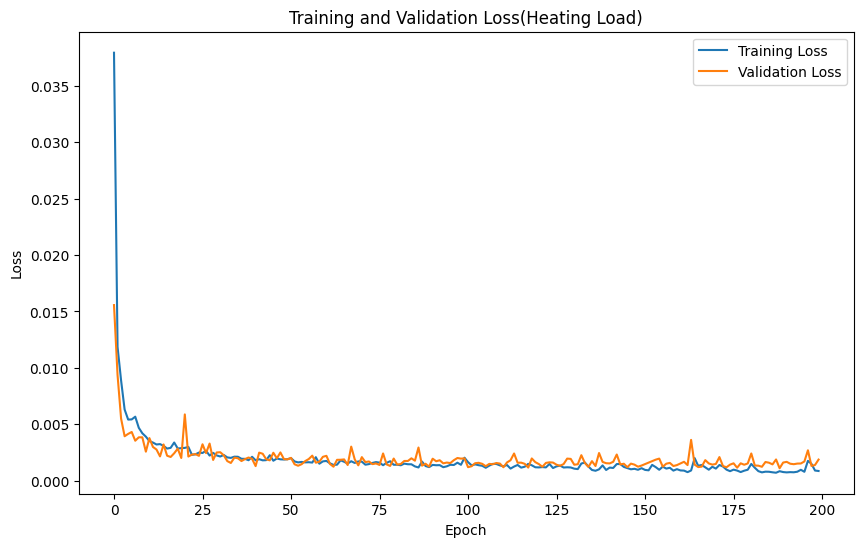

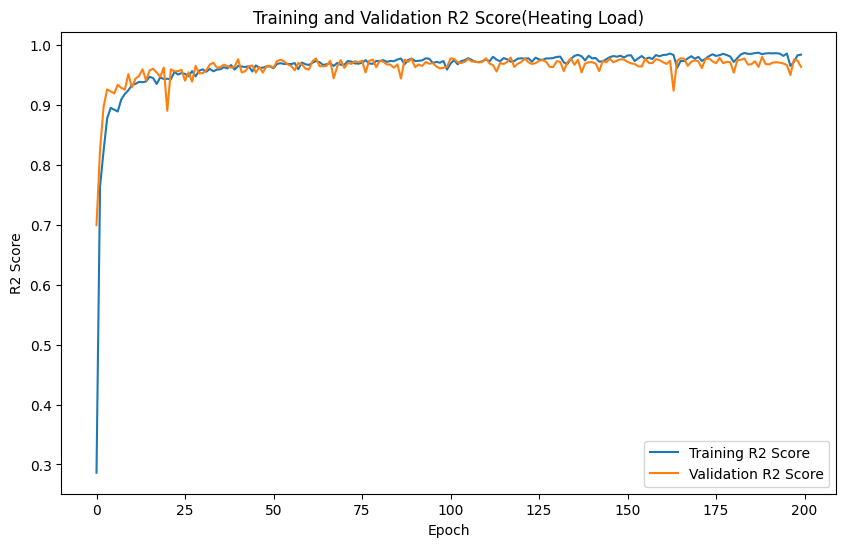

In [ ]:
# # Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=custom_optimizer, loss='mse' , metrics=[r2_metric])

# Train the model
history = model1.fit(X_train_combined, y_train_H, epochs=200, batch_size=42, validation_data=(X_test_combined, y_test_H), verbose =1)
y_pred = model1.predict(X_test_combined)
y_pred_train = model1.predict(X_train_combined)
mae = mean_absolute_percentage_error(y_test_H, y_pred)

mse = mean_squared_error(y_test_H, y_pred)
r_squared = r2_score(y_test_H, y_pred)
mae_r=mean_absolute_error(y_test_H, y_pred)
cor = corrcoef(y_test_H, y_pred)
print('For test Data with Output Heating Energy')
print(f'Mean Absolute Percentage Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r_squared}')
print(f'MAE: {mae_r}')
print(f'Correlation: {cor}')


mae_train = mean_absolute_percentage_error(y_train_H, y_pred_train)
mse_train = mean_squared_error(y_train_H, y_pred_train)
r_squared_train = r2_score(y_train_H, y_pred_train)
mae_r_train=mean_absolute_error(y_train_H, y_pred_train)
cor_train = corrcoef(y_train_H, y_pred_train)
print('For train Data with output Heating Energy')
print(f'Mean Absolute Percentage Error (MAE): {mae_train}')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'R-squared: {r_squared_train}')
print(f'MAE: {mae_r_train}')
print(f'Correlation: {cor_train}')

# Inverse transform predictions to original scale
y_pred_original_scale = scaler_y_H.inverse_transform(y_pred)
y_test_original_scale = scaler_y_H.inverse_transform(y_test_H)

# Calculate R-squared
print('\n')
print('For scaled data')
r_squared = r2_score(y_test_original_scale, y_pred_original_scale)
print(f'R-squared for original value(Scaled): {r_squared}')

mae_values = [mean_absolute_percentage_error(y_test_original_scale, y_pred_original_scale)]
mse_values = [mean_squared_error(y_test_original_scale, y_pred_original_scale) ]
r2_values = [r2_score(y_test_original_scale, y_pred_original_scale) ]
cor_s = corrcoef(y_test_original_scale, y_pred_original_scale)
    # Display R-squared values for each output

print(f'R-squared for Output Dimension T: {r2_values}')

print(f'Mean Absolute Percentage Error (MAPE) T: {mae_values}')
print(f'cor: {cor_s}')
print('\n')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss(Heating Load)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_metric'], label='Training R2 Score')
plt.plot(history.history['val_r2_metric'], label='Validation R2 Score')
plt.title('Training and Validation R2 Score(Heating Load)')
plt.xlabel('Epoch')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

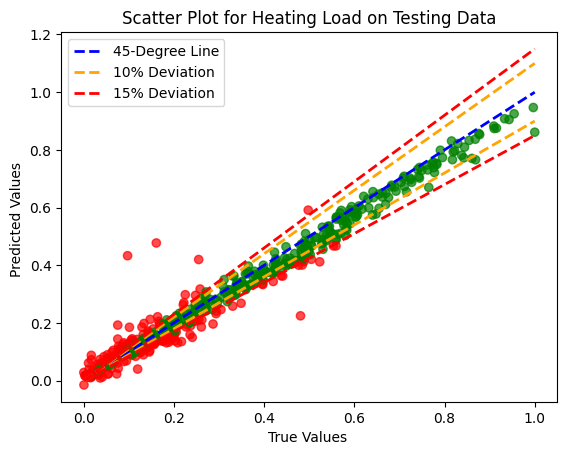

Number of data points within 15% deviation: 361/518
Number of data points within 10% deviation: 283/518


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train and y_train_pred are your training true and predicted values
true_values_train = y_test_H.flatten()
predicted_values_train = y_pred.flatten()

# Calculate the absolute percentage error for training data
absolute_percentage_error_train = np.abs((predicted_values_train - true_values_train) / true_values_train) * 100

# Set tolerance thresholds (e.g., 2% and 5%)
tolerance_threshold_2 = 10
tolerance_threshold_5 = 15

# Color-code the points based on the percentage difference
colors_train = np.where(absolute_percentage_error_train <= tolerance_threshold_5, 'green', 'red')

# Create a scatter plot for training data
plt.scatter(true_values_train, predicted_values_train, color=colors_train, alpha=0.7)
plt.plot([min(true_values_train), max(true_values_train)], [min(true_values_train), max(true_values_train)], linestyle='--', color='blue', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_2/100) * min(true_values_train), (1 - tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_2/100) * min(true_values_train), (1 + tolerance_threshold_2/100) * max(true_values_train)], linestyle='--', color='orange', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 - tolerance_threshold_5/100) * min(true_values_train), (1 - tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)
plt.plot([min(true_values_train), max(true_values_train)], [(1 + tolerance_threshold_5/100) * min(true_values_train), (1 + tolerance_threshold_5/100) * max(true_values_train)], linestyle='--', color='red', linewidth=2)

# Annotate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)
# plt.annotate(f'Within {tolerance_threshold_5}%: {num_within_5_percent}/{len(true_values_train)}',
#              xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='black')

# Custom legend handles
legend_handles = [
    Line2D([0], [0], linestyle='--', color='blue', linewidth=2),
    Line2D([0], [0], linestyle='--', color='orange', linewidth=2),
    Line2D([0], [0], linestyle='--', color='red', linewidth=2)
]

plt.xlabel('True Values ')
plt.ylabel('Predicted Values ')
plt.title('Scatter Plot for Heating Load on Testing Data')
plt.legend(legend_handles , ['45-Degree Line', f'10% Deviation', f'15% Deviation'], loc='upper left')
plt.show()

# Calculate the number of points within 5% deviation
num_within_5_percent = np.sum(absolute_percentage_error_train <= tolerance_threshold_5)

# Calculate the number of points within 2% deviation
num_within_2_percent = np.sum((absolute_percentage_error_train <= tolerance_threshold_2))

# Print the counts
print(f"Number of data points within 15% deviation: {num_within_5_percent}/{len(true_values_train)}")
print(f"Number of data points within 10% deviation: {num_within_2_percent}/{len(true_values_train)}")


In [ ]:
from keras.models import model_from_json

# Save the model architecture as JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to HDF5 format
model.save_weights("model.h5")

print("Model saved successfully.")

Model saved successfully.
